In [1]:
# importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin-1') # or 'iso-8859-1'

In [3]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [4]:
df['Order Country'].unique()

# change EE.UU (Estados Unidos) to USA
df.loc[df['Order Country'] == 'Estados Unidos','Order Country'] = 'USA'
df.loc[df['Customer Country'] == 'EE. UU.', 'Customer Country'] = 'USA'

df = df[(df['Order Country'] == 'USA') & (df['Customer Country'] == 'USA')]


df['Order Country']

,Order Country
183,USA
184,USA
185,USA
186,USA
187,USA
...,...
177547,USA
177548,USA
177549,USA
177550,USA


In [5]:

df.shape

(15442, 53)

In [6]:
df.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [7]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [8]:
df.columns

Index(['type', 'days_for_shipping_(real)', 'days_for_shipment_(scheduled)',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_email', 'customer_fname', 'customer_id',
       'customer_lname', 'customer_password', 'customer_segment',
       'customer_state', 'customer_street', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_(dateorders)', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'order_zipcode', 'product_card_id', 'product_category_id',
       'product_de

In [9]:
df.drop(['product_description','order_zipcode'], axis=1, inplace=True)

<ipython-input-9-2e025dcef655>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['product_description','order_zipcode'], axis=1, inplace=True)


In [10]:
df.nunique()

,0
type,4
days_for_shipping_(real),7
days_for_shipment_(scheduled),4
benefit_per_order,7239
sales_per_customer,1312
delivery_status,4
late_delivery_risk,2
category_id,25
category_name,24
customer_city,534


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15442 entries, 183 to 177551
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   type                           15442 non-null  object 
 1   days_for_shipping_(real)       15442 non-null  int64  
 2   days_for_shipment_(scheduled)  15442 non-null  int64  
 3   benefit_per_order              15442 non-null  float64
 4   sales_per_customer             15442 non-null  float64
 5   delivery_status                15442 non-null  object 
 6   late_delivery_risk             15442 non-null  int64  
 7   category_id                    15442 non-null  int64  
 8   category_name                  15442 non-null  object 
 9   customer_city                  15442 non-null  object 
 10  customer_country               15442 non-null  object 
 11  customer_email                 15442 non-null  object 
 12  customer_fname                 15442 non-null  o

In [12]:
df['shipping_date_(dateorders)']=pd.to_datetime(df['shipping_date_(dateorders)'])

<ipython-input-12-bf3fef139457>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shipping_date_(dateorders)']=pd.to_datetime(df['shipping_date_(dateorders)'])


In [13]:
df['day']=df['shipping_date_(dateorders)'].dt.day
df['month']=df['shipping_date_(dateorders)'].dt.month
df['year']=df['shipping_date_(dateorders)'].dt.year

<ipython-input-13-f4d110c05aa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day']=df['shipping_date_(dateorders)'].dt.day
<ipython-input-13-f4d110c05aa7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['shipping_date_(dateorders)'].dt.month
<ipython-input-13-f4d110c05aa7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [14]:
df['shipping_time'] = df['shipping_date_(dateorders)'].dt.time

<ipython-input-14-632fc05945ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shipping_time'] = df['shipping_date_(dateorders)'].dt.time


In [15]:
df.drop(['shipping_date_(dateorders)'], axis=1, inplace=True)

<ipython-input-15-9970f42df56e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['shipping_date_(dateorders)'], axis=1, inplace=True)


In [16]:
df.nunique()

,0
type,4
days_for_shipping_(real),7
days_for_shipment_(scheduled),4
benefit_per_order,7239
sales_per_customer,1312
delivery_status,4
late_delivery_risk,2
category_id,25
category_name,24
customer_city,534


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15442 entries, 183 to 177551
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   type                           15442 non-null  object 
 1   days_for_shipping_(real)       15442 non-null  int64  
 2   days_for_shipment_(scheduled)  15442 non-null  int64  
 3   benefit_per_order              15442 non-null  float64
 4   sales_per_customer             15442 non-null  float64
 5   delivery_status                15442 non-null  object 
 6   late_delivery_risk             15442 non-null  int64  
 7   category_id                    15442 non-null  int64  
 8   category_name                  15442 non-null  object 
 9   customer_city                  15442 non-null  object 
 10  customer_country               15442 non-null  object 
 11  customer_email                 15442 non-null  object 
 12  customer_fname                 15442 non-null  o

In [18]:
df.order_customer_id.nunique()

3781

In [19]:
# from sklearn.preprocessing import MinMaxScaler
# numeric_columns = ['days_for_shipment_(scheduled)', 'benefit_per_order', 'sales_per_customer', 'days_for_shipping_(real)','late_delivery_risk','category_id','department_id','order_customer_id','order_id','order_item_product_price','order_item_profit_ratio','order_item_quantity','sales','order_item_total','order_profit_per_order','product_card_id','product_price','product_status']

# scaler = MinMaxScaler()
# normalized_data = scaler.fit_transform(df[numeric_columns])

In [20]:
# normalized_data

In [21]:
# Step 1: Aggregate revenue per customer using 'Sales'
customer_revenue = df.groupby('customer_id')['sales'].sum().reset_index()
customer_revenue.columns = ['customer_id', 'total_revenue']

In [22]:
customer_revenue

,customer_id,total_revenue
0,2,549.970016
1,6,649.970001
2,12,849.930023
3,14,399.959992
4,25,799.880005
...,...,...
3776,12421,529.900009
3777,12423,944.880020
3778,12426,964.880028
3779,12427,961.880024


In [23]:
# Preview top customers by revenue
customer_revenue_sorted = customer_revenue.sort_values(by='total_revenue', ascending=False)
customer_revenue_sorted.head()

,customer_id,total_revenue
3104,10198,4269.570106
3558,11768,3754.620083
459,1540,3554.740084
1737,5640,3539.680084
3696,12180,3504.760056


In [24]:
## feature engineering

# Feature 1: Number of orders
order_count = df.groupby('customer_id').size().reset_index(name='order_count')


In [25]:
# Feature 2: Average order value
avg_order_value = df.groupby('customer_id')['sales'].mean().reset_index(name='avg_order_value')

In [26]:
# Feature 3: Total quantity ordered
total_quantity = df.groupby('customer_id')['order_item_quantity'].sum().reset_index(name='total_quantity')

In [27]:
# Feature 4: Average shipping days
avg_shipping_days = df.groupby('customer_id')['days_for_shipping_(real)'].mean().reset_index(name='avg_shipping_days')


In [28]:
# Merge features
customer_features = customer_revenue.merge(order_count, on='customer_id') \
                                    .merge(avg_order_value, on='customer_id') \
                                    .merge(total_quantity, on='customer_id') \
                                    .merge(avg_shipping_days, on='customer_id')

In [32]:
#customer id with maximum order count=19
customer_features.loc[customer_features['order_count'].idxmax()]

,3104
customer_id,10198.000000
total_revenue,4269.570106
order_count,19.000000
avg_order_value,224.714216
total_quantity,37.000000
avg_shipping_days,2.105263


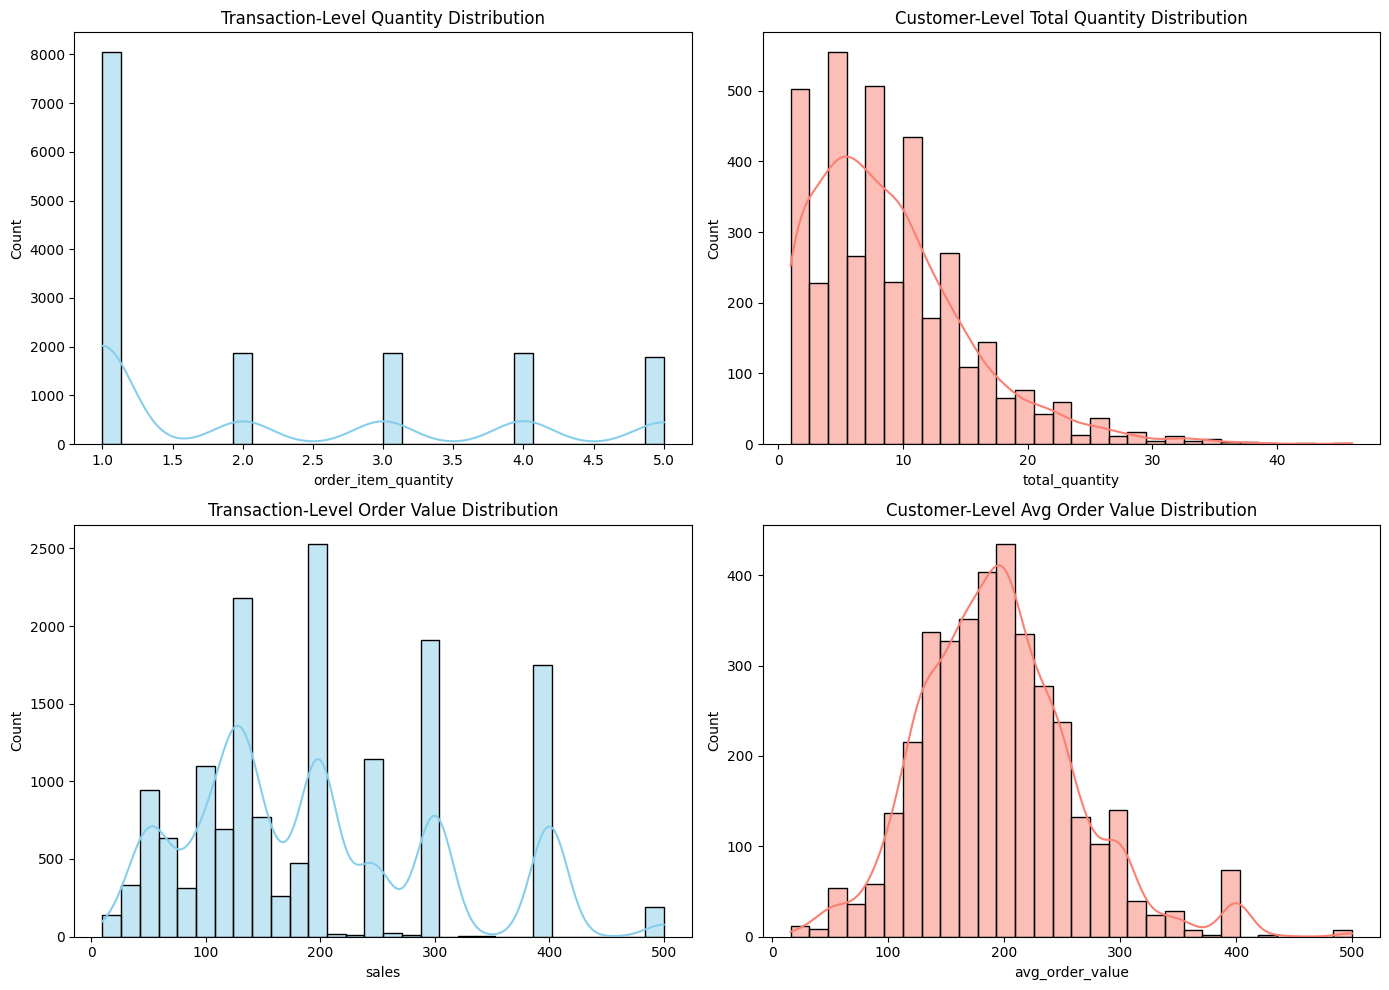

In [33]:
# Regenerate the side-by-side comparison plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Transaction-level quantity
sns.histplot(df['order_item_quantity'], bins=30, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Transaction-Level Quantity Distribution")

# Customer-level total quantity
sns.histplot(customer_features['total_quantity'], bins=30, kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title("Customer-Level Total Quantity Distribution")

# Transaction-level order value
sns.histplot(df['sales'], bins=30, kde=True, ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title("Transaction-Level Order Value Distribution")

# Customer-level average order value
sns.histplot(customer_features['avg_order_value'], bins=30, kde=True, ax=axes[1, 1], color="salmon")
axes[1, 1].set_title("Customer-Level Avg Order Value Distribution")

plt.tight_layout()
plt.show()


In [34]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15442 entries, 183 to 177551
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   type                           15442 non-null  object 
 1   days_for_shipping_(real)       15442 non-null  int64  
 2   days_for_shipment_(scheduled)  15442 non-null  int64  
 3   benefit_per_order              15442 non-null  float64
 4   sales_per_customer             15442 non-null  float64
 5   delivery_status                15442 non-null  object 
 6   late_delivery_risk             15442 non-null  int64  
 7   category_id                    15442 non-null  int64  
 8   category_name                  15442 non-null  object 
 9   customer_city                  15442 non-null  object 
 10  customer_country               15442 non-null  object 
 11  customer_email                 15442 non-null  object 
 12  customer_fname                 15442 non-null  o

In [35]:
df['order_date_(dateorders)'] = pd.to_datetime(df['order_date_(dateorders)'], errors='coerce')
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['order_item_quantity'] = pd.to_numeric(df['order_item_quantity'], errors='coerce')
df['days_for_shipping_(real)'] = pd.to_numeric(df['days_for_shipping_(real)'], errors='coerce')
df = df.dropna()

<ipython-input-35-f6fa599dc953>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date_(dateorders)'] = pd.to_datetime(df['order_date_(dateorders)'], errors='coerce')
<ipython-input-35-f6fa599dc953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
<ipython-input-35-f6fa599dc953>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

## trying this on small dataset

In [36]:
# Pick a customer with the most orders
sample_customer_id = df['customer_id'].value_counts().idxmax()
sample_data = df[df['customer_id'] == sample_customer_id].sort_values(by='order_date_(dateorders)')


In [37]:
sample_data.shape

(19, 54)

In [38]:
# Split by the median date
mid_date = sample_data['order_date_(dateorders)'].median()
past_orders = sample_data[sample_data['order_date_(dateorders)'] <= mid_date]
future_orders = sample_data[sample_data['order_date_(dateorders)'] > mid_date]


In [39]:
# Create a summary row
past_summary = {
    "customer_id": sample_customer_id,
    "midpoint_date": mid_date,
    "past_order_count": past_orders.shape[0],
    "avg_past_order_value": past_orders['sales'].mean(),
    "total_quantity_in_past": past_orders['order_item_quantity'].sum(),
    "avg_shipping_days_in_past": past_orders['days_for_shipping_(real)'].mean(),
}

In [40]:
future_summary = {
    "Future Order Count": future_orders.shape[0],
    "Future Revenue (Target)": future_orders['sales'].sum()
}


In [41]:
# Combine and display
demo_summary = {**past_summary, **future_summary}
demo_df = pd.DataFrame([demo_summary])
demo_df

,customer_id,midpoint_date,past_order_count,avg_past_order_value,total_quantity_in_past,avg_shipping_days_in_past,Future Order Count,Future Revenue (Target)
0,10198,2016-06-26 19:12:00,10,201.975005,20,3.0,9,2249.820053


### Predict Future Revenue (Business Targeting Version)


In [44]:
# Function to split order history into past (features) and future (target)
def create_past_future(group):
    mid = group['order_date_(dateorders)'].quantile(0.5)
    past = group[group['order_date_(dateorders)'] <= mid]
    future = group[group['order_date_(dateorders)'] > mid]
    return pd.Series({
        'order_count': past.shape[0],
        'avg_order_value': past['sales'].mean(),
        'total_quantity': past['order_item_quantity'].sum(),
        'avg_shipping_days': past['days_for_shipping_(real)'].mean(),
        'future_revenue': future['sales'].sum()
    })

In [46]:
# Apply to all customers
customer_df = df.groupby('customer_id').apply(create_past_future).dropna()



<ipython-input-46-8f05436112ff>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_df = df.groupby('customer_id').apply(create_past_future).dropna()


In [47]:
# Split data for modeling
X = customer_df[['order_count', 'avg_order_value', 'total_quantity', 'avg_shipping_days']]
y = customer_df['future_revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 250.54998888662112
R² Score: -0.09271064840650434


<Axes: xlabel='future_revenue', ylabel='Count'>

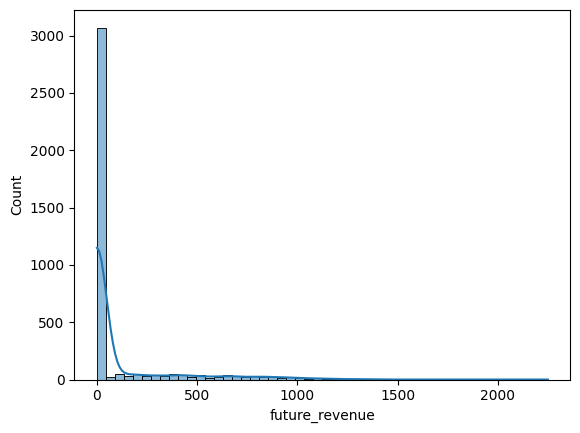

In [52]:
import seaborn as sns
sns.histplot(y, bins=50, kde=True)

In [54]:
import numpy as np
y_log = np.log1p(y)

<Axes: xlabel='future_revenue', ylabel='Count'>

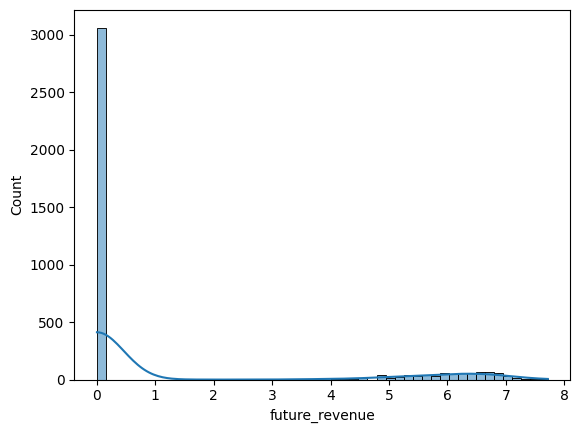

In [55]:
import seaborn as sns
sns.histplot(y_log, bins=50, kde=True)